In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import random

time_start=time.time()

In [2]:
import tensorflow as tf
from tensorflow import keras

# download the data
num_train = 30000
num_test = 10000
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[0:num_train,:,:]
train_labels = train_labels[0:num_train]
print('Training images shape:',train_images.shape)
print('Training labels shape:',train_labels.shape)
print('Testing images shape:',test_images.shape)
print('Training labels shape:',test_labels.shape)

# reshape and scale the images
train_images = train_images.reshape(num_train,28*28)
train_images = train_images.T
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(num_test, 28*28)
test_images = test_images.T
test_images = test_images.astype('float32')/255

print('Reshaped training images shape:', train_images.shape)
print('Reshaped training labels shape:', train_labels.shape)
print('Reshaped testing images shape:', test_images.shape)
print('Reshaped testing labels shape:', test_labels.shape)

# process the labels to one-hot encoded form
from tensorflow.keras.utils import to_categorical
train_labels1 = to_categorical(train_labels)
test_labels1 = to_categorical(test_labels)
train_labels1 = train_labels1.T
test_labels1 = test_labels1.T
print('One-hot encoded training labels shape:', train_labels1.shape)
print('One-hot encoded testing labels shape:', test_labels1.shape)

/Users/yuqinie/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yuqinie/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yuqinie/opt/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yuqinie/o

Training images shape: (30000, 28, 28)
Training labels shape: (30000,)
Testing images shape: (10000, 28, 28)
Training labels shape: (10000,)
Reshaped training images shape: (784, 30000)
Reshaped training labels shape: (30000,)
Reshaped testing images shape: (784, 10000)
Reshaped testing labels shape: (10000,)
One-hot encoded training labels shape: (10, 30000)
One-hot encoded testing labels shape: (10, 10000)


In [3]:
X_train = np.row_stack((train_images, np.ones((1,num_train))))
y_train = train_labels1
X_test = np.row_stack((test_images, np.ones((1,num_test))))
y_test = test_labels1
print ('Train X Shape: ', X_train.shape)
print ('Train Y Shape: ', y_train.shape)
print ('I have m = %d training examples!' % (X_train.shape[1]))

print ('\nTest X Shape: ', X_test.shape)


Train X Shape:  (785, 30000)
Train Y Shape:  (10, 30000)
I have m = 30000 training examples!

Test X Shape:  (785, 10000)


In [4]:
#define the structure of NN
def define_structure(X, Y, hidden_unit0, hidden_unit1):
    input_unit = X.shape[0]  # size of input layer
    hidden_unit0 = hidden_unit0  # hidden layer of size
    hidden_unit1 = hidden_unit1  # hidden layer of size
    output_unit = Y.shape[0]  # size of output layer
    return (input_unit, hidden_unit0, hidden_unit1, output_unit)


hidden_unit0 = 512
hidden_unit1 = 100
(input_unit, hidden_unit0, hidden_unit1, output_unit) = define_structure(
    X_train, y_train, hidden_unit0, hidden_unit1)
print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer0 is:  = " + str(hidden_unit0))
print("The size of the hidden layer1 is:  = " + str(hidden_unit1))
print("The size of the output layer is:  = " + str(output_unit))

The size of the input layer is:  = 785
The size of the hidden layer0 is:  = 512
The size of the hidden layer1 is:  = 100
The size of the output layer is:  = 10


In [5]:
# initialize parameters
def parameters_initialization(input_unit, hidden_unit0, hidden_unit1, output_unit):
    np.random.seed(2) 
    W0 = np.random.randn(hidden_unit0, input_unit)*0.01
    W1 = np.random.randn(hidden_unit1, hidden_unit0)*0.01
    W2 = np.random.randn(output_unit, hidden_unit1)*0.01
    parameters = {"W0": W0,
                  "W1": W1,
                  "W2": W2}
    
    return parameters

In [6]:
#forward propagation and backward propagation

def sigmoid(z):
    return 1/(1+np.exp(-z))

def abssigmoid(z):
    return abs(1/(1+np.exp(-z)))

def multinomial(z):
    return np.exp(z)/sum(np.exp(z))

def relu(x):
    return np.where(x<0,0,x)


def forward_propagation(X,Y, parameters):
    m = X.shape[1] # number of training example
    W0 = parameters['W0']
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    Z0 = np.dot(W0, X)
    A0 = relu(Z0)
    Z1 = np.dot(W1, A0)
    A1 = Z1
    Z2 = np.dot(W2, A1)
    A2 = multinomial(Z2)
    cache = {"Z0": Z0,"A0": A0, "Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    H=-1/m*np.multiply(Y,np.log(A2))
    L=sum(sum(H[l]) for l in range(len(H)))
    
    return L, A2, cache


def backward_propagation(parameters, cache, X, Y):
    #number of training example
    m = X.shape[1]
    
    W0 = parameters['W0']
    W1 = parameters['W1']
    W2 = parameters['W2']
    A0 = cache['A0']
    A1 = cache['A1']
    A2 = cache['A2']
    
    dZ2 = A2-Y
    dW2 = 1/m*np.dot(dZ2, A1.T)
    dA1 = np.dot(W2.T,dZ2)
    dZ1 = dA1
    dW1 = 1/m*np.dot(dZ1, A0.T)
    dA0 = np.dot(W1.T,dA1)
    Z0 = np.dot(W0,X)
    dZ0 = np.multiply(dA0, 0.5*(1+np.sign(Z0)))
    dW0 = 1/m*np.dot(dZ0, X.T)
    
    grads = {"dW0": dW0, "dW1": dW1,  "dW2": dW2} 
    
    return grads

# gradient descent algorithm
def gradient_descent(parameters, grads, learning_rate):
    W0 = parameters['W0']
    W1 = parameters['W1']
    W2 = parameters['W2']
   
    dW0 = grads['dW0']
    dW1 = grads['dW1']
    dW2 = grads['dW2']
    W0 = W0 - learning_rate * dW0
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    
    parameters = {"W0": W0, "W1": W1, "W2": W2}
    
    return parameters

In [7]:
# train the NN
def neural_network_model(X, Y, hidden_unit0, hidden_unit1, num_iterations):
    np.random.seed(3)
    input_unit = define_structure(X, Y, hidden_unit0, hidden_unit1)[0]
    output_unit = define_structure(X, Y, hidden_unit0, hidden_unit1)[3]

    parameters = parameters_initialization(
        input_unit, hidden_unit0, hidden_unit1, output_unit)

    save_parameters = []

    for i in range(0, num_iterations):
        L, A2, cache = forward_propagation(X, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads, learning_rate=0.2)
        if (i+1) % 10 == 0:
            print("L after iteration %i: %f" % ((i+1), L))
            save_parameters.append(parameters)

    return parameters, save_parameters


parameters, save_parameters = neural_network_model(
    X_train, y_train, hidden_unit0, hidden_unit1, num_iterations=2000)

L after iteration 10: 2.301362
L after iteration 20: 2.299919
L after iteration 30: 2.297901
L after iteration 40: 2.294658
L after iteration 50: 2.288691
L after iteration 60: 2.275839
L after iteration 70: 2.242112
L after iteration 80: 2.135559
L after iteration 90: 1.856545
L after iteration 100: 1.526980
L after iteration 110: 1.260658
L after iteration 120: 1.015459
L after iteration 130: 0.842244
L after iteration 140: 0.739844
L after iteration 150: 0.673256
L after iteration 160: 1.063078
L after iteration 170: 0.588558
L after iteration 180: 0.550459
L after iteration 190: 0.521872
L after iteration 200: 0.498874
L after iteration 210: 0.479612
L after iteration 220: 0.463022
L after iteration 230: 0.448414
L after iteration 240: 0.435346
L after iteration 250: 0.423847
L after iteration 260: 0.423232
L after iteration 270: 0.569863
L after iteration 280: 0.394773
L after iteration 290: 0.384267
L after iteration 300: 0.375589
L after iteration 310: 0.367564
L after iteration

In [8]:
# do the pruning

def prediction(parameters, X, Y):
    L, A2, cache = forward_propagation(X,Y, parameters)
    predictions = A2.argmax(axis=0)  
    return predictions

def accuracy(Y, predictions):
    m = Y.shape[1]
    acc=0
    for v in range(m):
        if Y[predictions[v]][v] == 1:
            acc = acc+1
    return acc/m

# ramdonly prune half of the nodes
def random_pruning(parameters):
    W0 = parameters['W0']
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    (h0,n1)=W0.shape
    (h1,h0)=W1.shape
    (c,h1)=W2.shape
    W00=W0.copy()
    W11=W1.copy()
    W22=W2.copy()
    
    pr1=random.sample(range(0, h0), int(h0/2))
    pr2=random.sample(range(0, h1), int(h1/2))
    
    for i in range(int(h0/2)):
        W00[pr1[i],:]=np.zeros(n1)
        W11[:,pr1[i]]=np.zeros(h1)
        
    for i in range(int(h1/2)):
        W22[:,pr2[i]]=np.zeros(c)
        
    parameters2 = {"W0": W00, "W1": W11, "W2": W22}
    return parameters2

#prune all the phase
def phase_pruning(parameters):
    W0 = parameters['W0']
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    (h0,n1)=W0.shape
    (h1,h0)=W1.shape
    (c,h1)=W2.shape
    W00=W0.copy()
    W11=W1.copy()
    W22=W2.copy()
    
    W00=0.1*np.abs(W00)
    W11=0.1*np.abs(W11)
    W22=0.1*np.abs(W22)
        
    parameters2 = {"W0": W00, "W1": W11, "W2": W22}
    return parameters2

#prune all the amplitude
def amp_pruning(parameters):
    W0 = parameters['W0']
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    (h0,n1)=W0.shape
    (h1,h0)=W1.shape
    (c,h1)=W2.shape
    W00=W0.copy()
    W11=W1.copy()
    W22=W2.copy()
    
    W00=0.1*np.sign(W00)
    W11=0.1*np.sign(W11)
    W22=0.1*np.sign(W22)
        
    parameters2 = {"W0": W00, "W1": W11, "W2": W22}
    return parameters2

In [10]:
# calculate the accuracy vs iteration

gap=10
n_save=int(len(save_parameters)/gap)
origin_train_accuracy=np.zeros(n_save)
origin_test_accuracy=np.zeros(n_save)
onlyhalf_train_accuracy=np.zeros(n_save)
onlyhalf_test_accuracy=np.zeros(n_save)
onlyamp_train_accuracy=np.zeros(n_save)
onlyamp_test_accuracy=np.zeros(n_save)
onlyphase_train_accuracy=np.zeros(n_save)
onlyphase_test_accuracy=np.zeros(n_save)
onlyreal_train_accuracy=np.zeros(n_save)
onlyreal_test_accuracy=np.zeros(n_save)
onlyimag_train_accuracy=np.zeros(n_save)
onlyimag_test_accuracy=np.zeros(n_save)

for ss in range(n_save):
    
    print('ss=',ss+1,' total=',n_save)
    
    s = int((ss+1)*gap-1)
    
    parameters = save_parameters[s]
    
    predictions = prediction(parameters, X_train, y_train)
    origin_train_accuracy[ss] = float(accuracy(y_train, predictions)*100)
    predictions = prediction(parameters, X_test, y_test)
    origin_test_accuracy[ss] = float(accuracy(y_test, predictions)*100)
    L, A2, cache = forward_propagation(X_train, y_train, parameters)
    print ("L after iteration %i: %f" %(ss+1, L))
    
    n_t=10
    train_predictions = np.zeros(n_t)
    test_predictions = np.zeros(n_t)
    for i in range(n_t):
        parameters2=random_pruning(parameters)
        predictions = prediction(parameters2, X_train, y_train)
        train_predictions[i] = float(accuracy(y_train, predictions)*100)
        predictions = prediction(parameters2, X_test, y_test)
        test_predictions[i] = float(accuracy(y_test, predictions)*100)
    onlyhalf_train_accuracy[ss]=sum(train_predictions)/n_t
    onlyhalf_test_accuracy[ss]=sum(test_predictions)/n_t

    parameters2=phase_pruning(parameters)
    predictions = prediction(parameters2, X_train, y_train)
    train_predictions = float(accuracy(y_train, predictions)*100)
    predictions = prediction(parameters2, X_test, y_test)
    test_predictions = float(accuracy(y_test, predictions)*100)
    onlyamp_train_accuracy[ss]=train_predictions
    onlyamp_test_accuracy[ss]=test_predictions

    parameters2=amp_pruning(parameters)
    predictions = prediction(parameters2, X_train, y_train)
    train_predictions = float(accuracy(y_train, predictions)*100)
    predictions = prediction(parameters2, X_test, y_test)
    test_predictions = float(accuracy(y_test, predictions)*100)
    onlyphase_train_accuracy[ss]=train_predictions
    onlyphase_test_accuracy[ss]=test_predictions

ss= 1  total= 20
L after iteration 1: 1.498009
ss= 2  total= 20
L after iteration 2: 0.496801
ss= 3  total= 20
L after iteration 3: 0.374761
ss= 4  total= 20
L after iteration 4: 0.310205
ss= 5  total= 20
L after iteration 5: 0.260955
ss= 6  total= 20
L after iteration 6: 0.218681
ss= 7  total= 20
L after iteration 7: 0.183996
ss= 8  total= 20
L after iteration 8: 0.156766
ss= 9  total= 20
L after iteration 9: 0.135394
ss= 10  total= 20
L after iteration 10: 0.118261
ss= 11  total= 20
L after iteration 11: 0.104133
ss= 12  total= 20
L after iteration 12: 0.092190
ss= 13  total= 20
L after iteration 13: 0.081947
ss= 14  total= 20
L after iteration 14: 0.073076
ss= 15  total= 20
L after iteration 15: 0.065319
ss= 16  total= 20
L after iteration 16: 0.058493
ss= 17  total= 20
L after iteration 17: 0.052439
ss= 18  total= 20
L after iteration 18: 0.047056
ss= 19  total= 20
L after iteration 19: 0.042256
ss= 20  total= 20
L after iteration 20: 0.037967


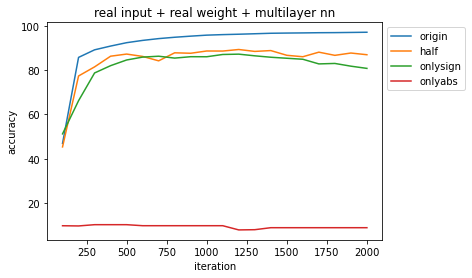

In [11]:
# plot the curve
plt.figure()
plt.plot([(i+1)*gap*10 for i in range(n_save)],origin_test_accuracy)
plt.plot([(i+1)*gap*10 for i in range(n_save)],onlyhalf_test_accuracy)
plt.plot([(i+1)*gap*10 for i in range(n_save)],onlyphase_test_accuracy)
plt.plot([(i+1)*gap*10 for i in range(n_save)],onlyamp_test_accuracy)
plt.title('real input + real weight + multilayer nn')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.legend(['origin','half','onlysign','onlyabs'],bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
time_end=time.time()
print('totally cost',time_end-time_start)